# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joemazzuca/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles

print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 6175


In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles

print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

Total articles about Ethereum: 1359


In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create the Bitcoin news dataframe

bitcoin_df = pd.DataFrame(bitcoin_sentiments)
    
# Reorder the BTC news dataframe columns

cols = ["compound", "negative", "neutral", "positive", "text", "date"]
bitcoin_df = bitcoin_df[cols]
    
# Drop date column from dataframe

bitcoin_df = bitcoin_df.drop(columns=['date'])
bitcoin_df.head()

,compound,negative,neutral,positive,text
0,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...
1,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...
2,0.5719,0.000,0.868,0.132,New York (CNN Business)Bitcoin has been flirti...
3,-0.5574,0.096,0.904,0.000,"When Mt. Gox went bankrupt in 2014, it was the..."
4,-0.3818,0.176,0.689,0.135,Ban reflects Twitters failure to promote healt...


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create Etherium news dataframe

ethereum_df = pd.DataFrame(ethereum_sentiments)
    
# Reorder the ETH news dataframe columns

cols = ["compound", "negative", "neutral", "positive", "text", "date"]
ethereum_df = ethereum_df[cols]
    
# Drop the date column from the ETH dataframe

ethereum_df = ethereum_df.drop(columns=['date'])
ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...
1,0.3412,0.000,0.926,0.074,Cryptocurrencies stole headlines on the first ...
2,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...
3,0.3612,0.000,0.932,0.068,NEW YORK (Reuters) - Total investor inflows in...
4,-0.2732,0.060,0.940,0.000,Bitcoin fizzled in Monday trading as the famou...


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,94.000000,94.000000,94.000000,94.000000
mean,0.112456,0.019777,0.933372,0.046862
std,0.315894,0.038115,0.077006,0.063216
min,-0.599400,0.000000,0.675000,0.000000
25%,0.000000,0.000000,0.897000,0.000000
50%,0.000000,0.000000,0.941500,0.000000
75%,0.361200,0.000000,1.000000,0.094500
max,0.817300,0.176000,1.000000,0.233000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,89.000000,89.000000,89.000000,89.000000
mean,0.184248,0.022989,0.909258,0.067764
std,0.361737,0.040407,0.085373,0.075789
min,-0.700300,0.000000,0.688000,0.000000
25%,0.000000,0.000000,0.856000,0.000000
50%,0.102700,0.000000,0.930000,0.055000
75%,0.458800,0.048000,1.000000,0.128000
max,0.877900,0.167000,1.000000,0.263000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etherium had the highest mean positive score.

Q: Which coin had the highest compound score?

A: Etherium had the highest compound score.

Q. Which coin had the highest positive score?

A: Etherium had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()

In [11]:
# Expand the default stopwords list if necessary
print(stopwords.words('english'))
sw_addons = {'also', 'since', 'youve'}

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    
    # Convert the words to lowercase    
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation
    re_clean = regex.sub('', text)
    
    # Remove the stop words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...,"[government, india, considering, tax, bitcoin,..."
1,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...,"[week, shattered, yearslong, aspiration, reach..."
2,0.5719,0.000,0.868,0.132,New York (CNN Business)Bitcoin has been flirti...,"[new, york, cnn, businessbitcoin, ha, flirting..."
3,-0.5574,0.096,0.904,0.000,"When Mt. Gox went bankrupt in 2014, it was the...","[mt, gox, went, bankrupt, wa, world, largest, ..."
4,-0.3818,0.176,0.689,0.135,Ban reflects Twitters failure to promote healt...,"[ban, reflects, twitters, failure, promote, he..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...,"[securities, exchange, commission, plan, sue, ..."
1,0.3412,0.000,0.926,0.074,Cryptocurrencies stole headlines on the first ...,"[cryptocurrencies, stole, headline, first, sto..."
2,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...,"[bitcoin, wa, derided, serious, investor, bubb..."
3,0.3612,0.000,0.932,0.068,NEW YORK (Reuters) - Total investor inflows in...,"[new, york, reuters, total, investor, inflow, ..."
4,-0.2732,0.060,0.940,0.000,Bitcoin fizzled in Monday trading as the famou...,"[bitcoin, fizzled, monday, trading, famously, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(10)))

{('virtual', 'currency'): 28, ('char', 'reuters'): 28, ('currency', 'bitcoin'): 28, ('illustration', 'taken'): 25, ('bitcoin', 'seen'): 21, ('representation', 'virtual'): 19, ('reuters', 'bitcoin'): 18, ('reuters', 'stafffile'): 18, ('stafffile', 'photo'): 18, ('photo', 'representation'): 18}


In [17]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ' '.join(ethereum_df.text)
ethereum_processed = tokenizer(ethereum_text)
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_ngrams.most_common(10)))

{('virtual', 'currency'): 14, ('currency', 'bitcoin'): 13, ('illustration', 'taken'): 13, ('char', 'reuters'): 11, ('reuters', 'stafffile'): 11, ('stafffile', 'photo'): 11, ('char', 'bitcoin'): 10, ('bitcoin', 'seen'): 10, ('photo', 'representation'): 8, ('representation', 'virtual'): 8}


In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin
bitcoin_top10 = token_count(bitcoin_processed)
bitcoin_top10

[('char', 93), ('bitcoin', 80), ('reuters', 66)]

In [20]:
# Get the top 10 words for Ethereum
ethereum_top10 = token_count(ethereum_processed)
ethereum_top10

[('char', 89), ('bitcoin', 52), ('ha', 28)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

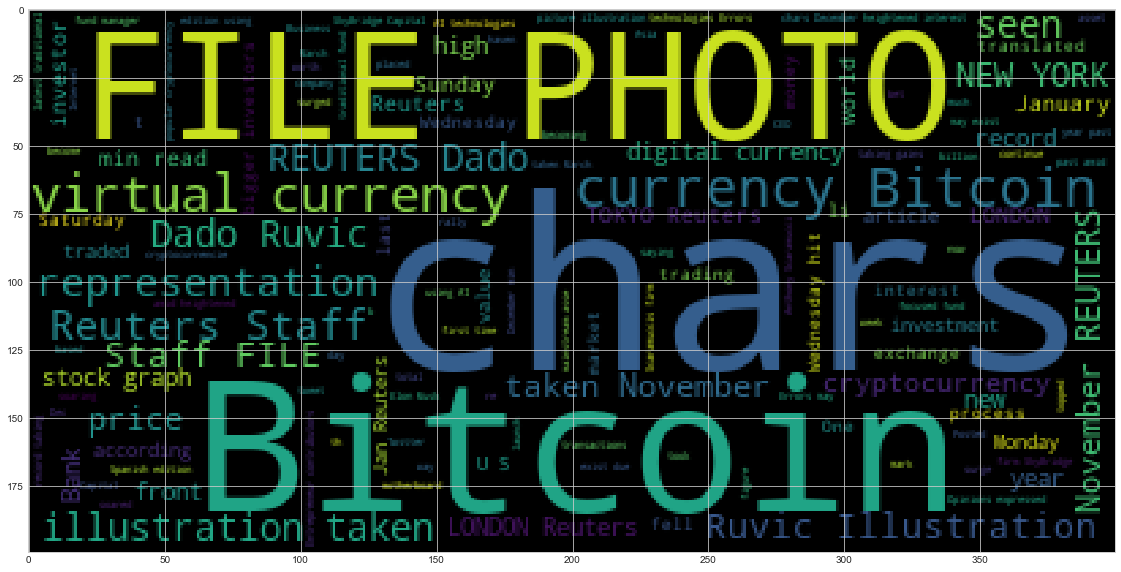

In [22]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

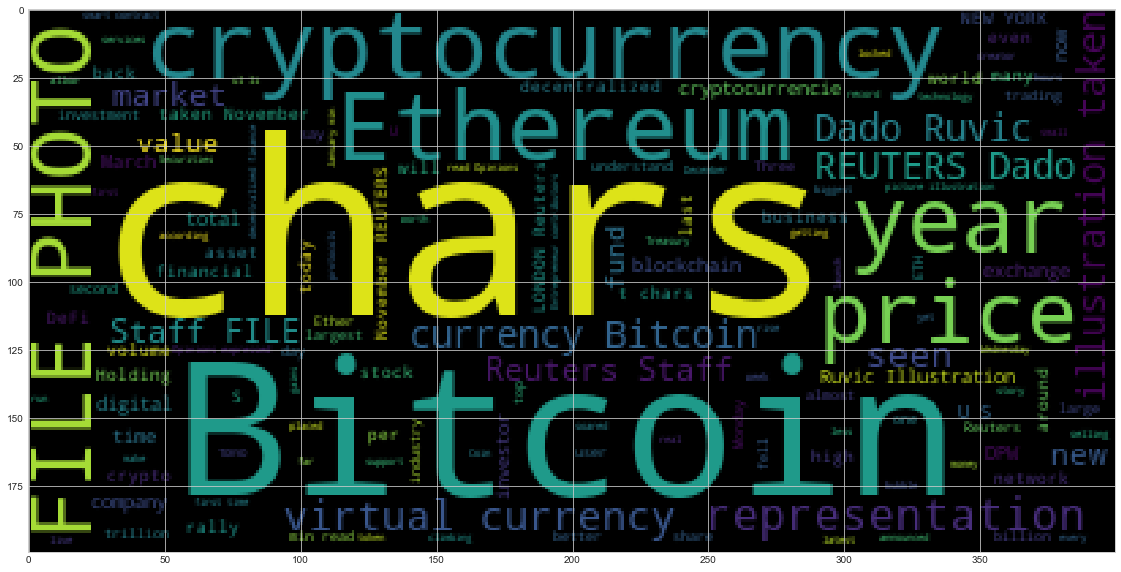

In [23]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 20.6 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_text

'The government of India is considering an 18% tax on all bitcoin transactions, according to a new report from the Times of India. Its not clear whether the proposed goods and services tax (GST) would… [+1397 chars] Just weeks after it shattered its yearslong aspiration of reaching $20,000 in value, Bitcoin is at it again. On Saturday, the cryptocurrency passed $33,000 in value, according to CoinDesk, before dip… [+2123 chars] New York (CNN Business)Bitcoin has been flirting with the $30,000 mark for weeks, and finally passed that record-setting level Saturday. The virtual currency is now valued at above $33,000, an all-ti… [+2108 chars] When Mt. Gox went bankrupt in 2014, it was the world’s largest Bitcoin exchange, holding 850,000 Bitcoins from thousands of users. Now, creditors might finally be able to get a portion of those riche… [+626 chars] Ban reflects Twitters failure to promote healthy conversation\r\nPhoto by Hannah McKay-Pool/Getty Images\r\nTwitter CEO Jack Dorsey, in a se

In [28]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin Named Entity Recognition"

In [29]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [30]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text + ' ' + ent.label_)

India GPE
18% PERCENT
bitcoin GPE
the Times of India ORG
Just weeks DATE
20,000 MONEY
Bitcoin GPE
Saturday DATE
33,000 MONEY
CoinDesk PERSON
New York GPE
CNN ORG
$30,000 mark MONEY
weeks DATE
Saturday DATE
above $33,000 MONEY
Mt. Gox PERSON
2014 DATE
Bitcoin GPE
850,000 CARDINAL
Bitcoins PERSON
thousands CARDINAL
Twitters NORP
Hannah McKay-Pool/Getty PERSON
Twitter ORG
Jack Dorsey PERSON
Tweets GPE
US GPE
Don PERSON
The Securities and Exchange Commission ORG
Gemini PERSON
Blockrize PERSON
today DATE
Blockrizes GPE
Later this year DATE
bitcoin GPE
the popular cryptocurrency exchange ORG
Last Sunday DATE
Bitcoin GPE
50% PERCENT
the previous month DATE
the week DATE
24.8% PERCENT
Bitcoin GPE
12th ORDINAL
Forbes ORG
Business News ORG
Fergal Smith PERSON
Maiya Keidan PERSON
Reuters ORG
Canadian NORP
Reuters ORG
LONDON GPE
Dec 30 DATE
Reuters ORG
Bitcoin GPE
Wednesday DATE
a record $28,599.99 MONEY
this year DATE
295% PERCENT
3.5% PERCENT
28,349 MONEY
Reuters ORG
LONDON GPE
Jan 4 DATE
Reuter

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
ethereum_text = ' '.join(ethereum_df.text)
ethereum_text

'The Securities and Exchange Commission plans to sue Ripple in federal civil court for selling unregistered securities, according to a news release published online by the cryptocurrency company late … [+2950 chars] Cryptocurrencies stole headlines on the first stock-market trading day of 2021, with bitcoin and ethereum selling off steeply after blistering run-ups over the weekend.\r\nBut investors need not worry … [+2877 chars] Bitcoin was once derided by serious investors as a bubble or a Ponzi scheme. But this year, it has become an irresistible investment for many of them.\xa0\r\nJust this Wednesday, bitcoin topped $20,000 fo… [+5208 chars] NEW YORK (Reuters) - Total investor inflows into cryptocurrency funds and products hit $5.6 billion so far this year, up more than 600% from 2019, according to the latest data from asset manager Coin… [+2077 chars] Bitcoin fizzled in Monday trading as the famously volatile cryptocurrency pulled back after a spectacular new-year rally.\r\nPrices 

In [32]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum Named Entity Recognition"

In [33]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [34]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text + ' ' + ent.label_)

The Securities and Exchange Commission ORG
first ORDINAL
day of 2021 DATE
bitcoin GPE
the weekend DATE
Bitcoin GPE
this year DATE
Wednesday DATE
bitcoin GPE
20,000 MONEY
NEW YORK PERSON
Reuters ORG
$5.6 billion MONEY
this year DATE
more than 600% PERCENT
2019 DATE
Coin ORG
Bitcoin GPE
Monday DATE
new-year DATE
as much as 17 CARDINAL
March DATE
Vitalik Buterin PERSON
14 CARDINAL
11 CARDINAL
Ethereum ORG
second ORDINAL
above $1,000 MONEY
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
2020 DATE
Las Vegas GPE
dozens CARDINAL
3080 CARDINAL
second ORDINAL
December 2020 DATE
first ORDINAL
Ethereum 2.0 ORG
January DATE
9, 2021 DATE
7 min QUANTITY
2020 DATE
the year DATE
Bitcoin GPE
November

---